In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [4]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


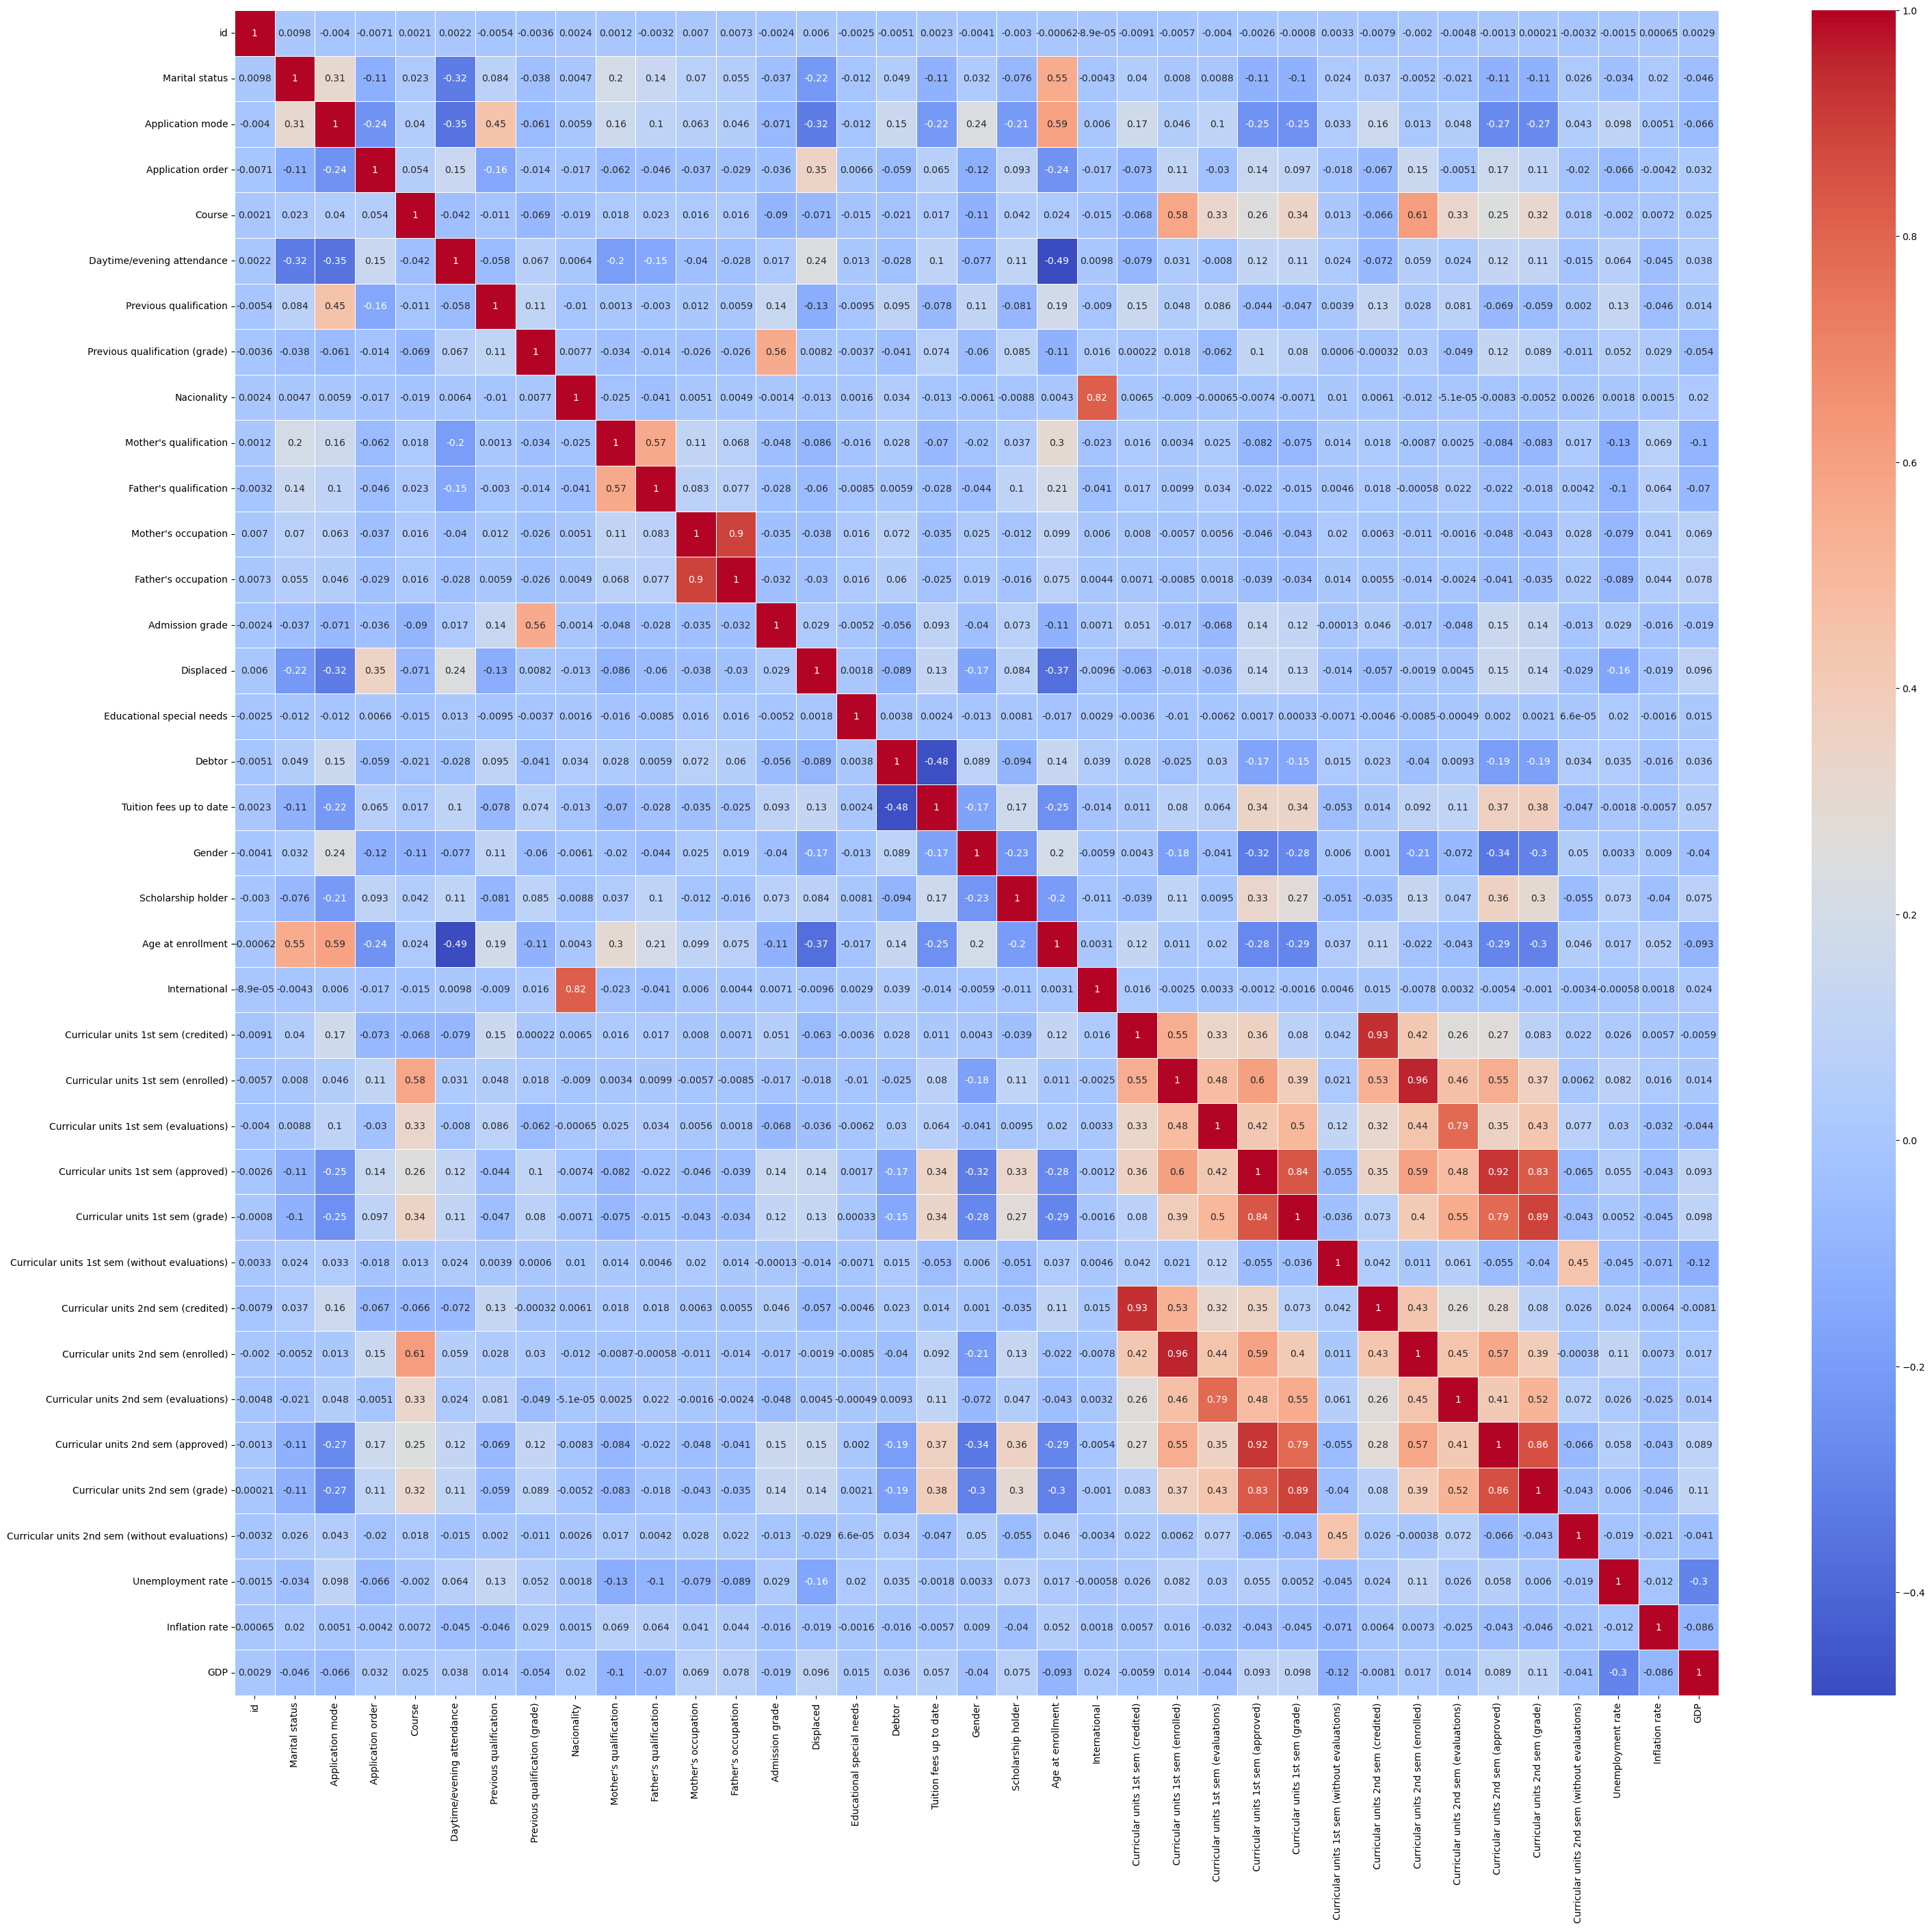

In [6]:
plt.figure(figsize = (35,32))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [7]:
df.Course.unique()

array([9238, 9254, 9500,  171, 9085, 9773, 9003, 9853, 9147, 9670, 8014,
       9119, 9991, 9130, 9556, 9070,   33,  979,   39], dtype=int64)

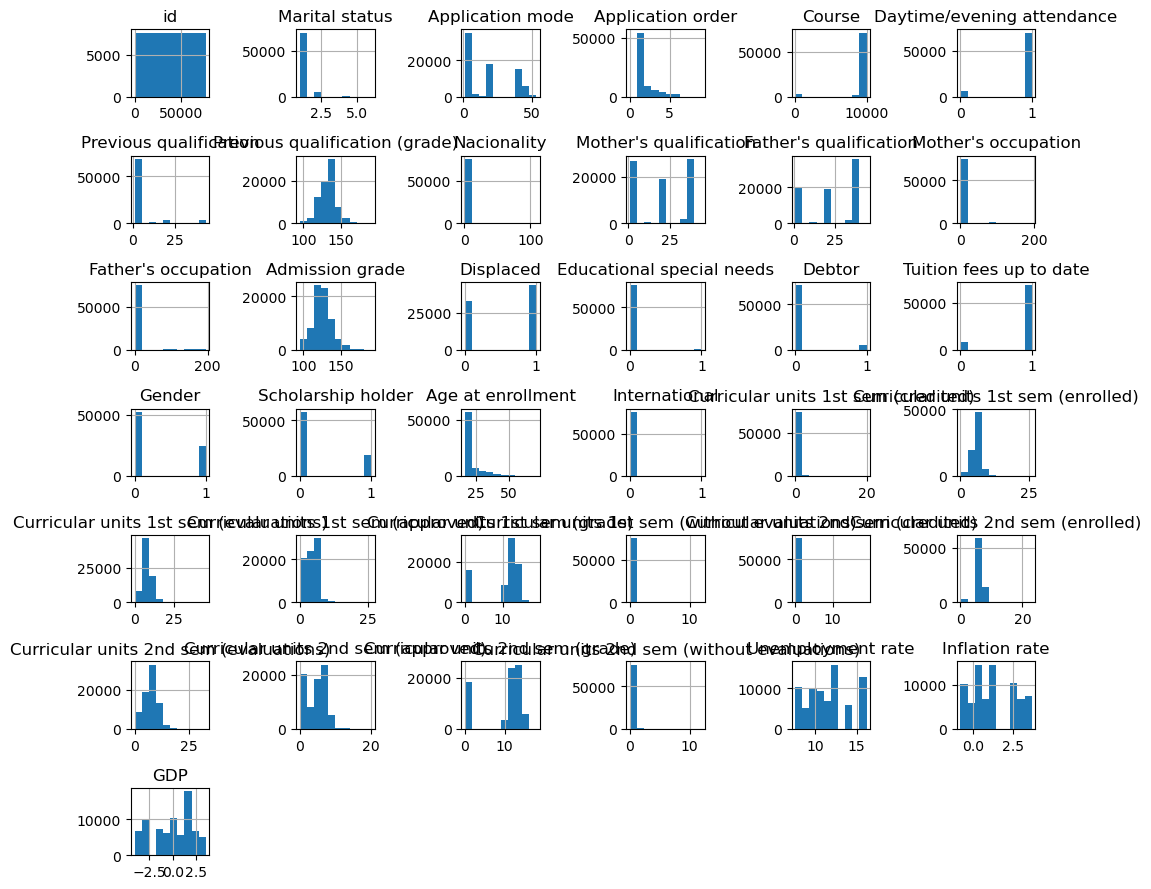

In [8]:

df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [9]:

lb = LabelEncoder()
df['Course'] = lb.fit_transform(df['Course'])

In [10]:
df['Curricular units 2nd sem (grade)'].unique()

array([12.42857143,  0.        , 12.82      , ..., 18.        ,
       13.63571429, 14.96666667])

In [11]:
df['Curricular units 2nd sem (grade)'] = df['Curricular units 2nd sem (grade)'].round(2)

In [12]:
features =['Previous qualification (grade)']
min_max = MinMaxScaler()
df[features] = min_max.fit_transform(df[features])

In [13]:
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,11,1,1,0.326316,1,1,...,0,6,7,6,12.43,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,11,1,1,0.315789,1,19,...,0,6,9,0,0.00,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,12,1,1,0.442105,1,3,...,0,6,0,0,0.00,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,13,1,1,0.378947,1,19,...,0,8,11,7,12.82,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,13,1,1,0.389474,1,19,...,0,7,12,6,12.93,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,12,1,1,0.273684,1,19,...,0,6,8,5,10.60,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,12,1,1,0.315789,1,1,...,0,6,9,6,13.88,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,7,1,1,0.452632,1,37,...,0,5,8,5,11.40,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,6,1,1,0.431579,1,38,...,0,6,0,0,0.00,0,7.6,2.6,0.32,Dropout


In [14]:
df= df.drop("id",axis=1)
X = df.drop('Target',axis= 1)
y = df['Target']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
model = LogisticRegression() 
model.fit(X_train, y_train)

C:\Users\swara\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:

y_pred = model.predict(X_test)


In [19]:
# # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8008363826450601


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.83


In [42]:
dt = pd.read_csv('test.csv')
dt

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [43]:

dt['Course'] = lb.fit_transform(dt['Course'])

In [44]:
dt['Curricular units 2nd sem (grade)'] = dt['Curricular units 2nd sem (grade)'].round(2)

In [45]:

dt['Previous qualification (grade)'] = min_max.fit_transform(dt[['Previous qualification (grade)']])

In [46]:
dt_test = dt.drop("id",axis=1)



In [47]:
dt_test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,15,1,1,0.484211,1,3,1,...,0,0,8,0,0,0.00,0,13.9,-0.3,0.79
1,1,1,1,12,1,1,0.347368,1,1,19,...,0,0,6,6,6,13.50,0,11.1,0.6,2.02
2,1,1,1,12,1,1,0.242105,1,1,19,...,0,0,6,11,5,11.00,0,15.5,2.8,-4.06
3,1,44,1,11,1,39,0.368421,1,1,19,...,0,3,8,14,5,11.00,0,8.9,1.4,3.51
4,1,39,1,17,1,1,0.157895,1,1,37,...,0,0,6,9,4,10.67,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,1,1,1,0.347368,1,38,37,...,0,0,0,0,0,0.00,0,15.5,2.8,-4.06
51008,2,39,1,9,1,19,0.401053,1,19,37,...,0,0,5,5,0,0.00,0,9.4,-0.8,-3.12
51009,1,1,1,1,1,1,0.336842,1,1,1,...,0,0,0,0,0,0.00,0,15.5,2.8,-4.06
51010,1,1,3,18,1,1,0.389474,1,19,19,...,0,0,6,9,3,13.00,0,7.6,2.6,0.32


In [48]:
y_pred = rf_classifier.predict(dt_test)

In [49]:
y_pred

array(['Dropout', 'Graduate', 'Graduate', ..., 'Dropout', 'Dropout',
       'Dropout'], dtype=object)

In [51]:
submission_test = pd.DataFrame({'id': dt['id'], 'Target': y_pred})
submission_test.to_csv(r'C:\Users\swara\Downloads\submission_test.csv', index=False)

print("Predictions saved to 'C:\\Users\\swara\\Downloads\\submission_test.csv'")

Predictions saved to 'C:\Users\swara\Downloads\submission_test.csv'
